In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Read the train dataset
df=pd.read_csv("train.csv")
dataset=df.copy()
#We will build our preprocessedDataset step by step
preprocessedDataset=pd.DataFrame()
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Let's see features
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# in order to obtain the percentage of missing values:

dataset.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [8]:
#Simply remove the features which are above %80 missing values.
dataset=dataset.drop(columns=["Alley","Fence","PoolQC","MiscFeature"])

In [9]:
def plotNumericFeatures(df, featureName):

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    #sns.histplot(df[featureName], bins=100)
    plt.hist(np.array(dataset[[featureName]]),bins=100)
    plt.title('Histogram')
    
    # boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[featureName])
    plt.title('Boxplot')

    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[featureName], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.show()


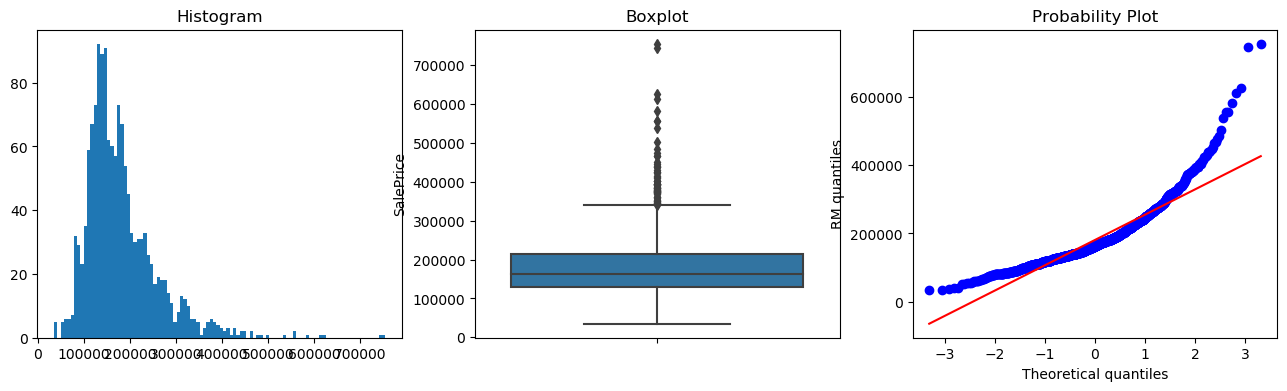

In [10]:
#First, briefly analyze and try to get insight from target for this regression problem
"""
plt.hist(np.array(dataset[["SalePrice"]]),bins=100)
plt.show()
"""
plotNumericFeatures(dataset, featureName="SalePrice")
#It seems right-skewed target data
#Statistically Outlier can be found using : IQ=75%-25% => (25%-1.5*IQ,%75+1.5*IQ) outside of these points can accept as outliers
#Later, we should identify cause of the outliers to generate reasonable preprocessed output. Which features effect the outliers? 

In [11]:
targetDataStats=dataset["SalePrice"].describe().astype(float)
print(targetDataStats)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [12]:
IQ=targetDataStats["75%"]-targetDataStats["25%"]#IQ:Interquartile
rightSideLimit=targetDataStats["75%"]+1.5*IQ
leftSideLimit=targetDataStats["25%"]-1.5*IQ
print("Lower Bound :"+str(leftSideLimit))
print("Upper Bound :"+str(rightSideLimit))
#We can statistically consider the values bigger than upper bound are outliers, we will examine what causes the outliers in the future

Lower Bound :3937.5
Upper Bound :340037.5


In [13]:
def plotCategoricFeatures(df, featureName,targetName,avgTrue=True):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[featureName], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df['percentageOfCategory'], color='lightgrey')
    ax2.plot(df.index, df[targetName], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of each category')
    ax.set_xlabel(featureName)
    if (avgTrue==True):ax2.set_ylabel('Average Target per category')
    else:ax2.set_ylabel('Std of Target per category')
    plt.show()

In [14]:
def calculateMeanTargetPerCategory(df, featureName, targetName):

    # total number of Dataset
    totalRowData = len(df)

    # percentage of each label
    temp_df = pd.Series(df[featureName].value_counts() / totalRowData).reset_index()
    temp_df.columns = [featureName, 'percentageOfCategory']

    # add the mean Target
    temp_df = temp_df.merge(df.groupby([featureName])[targetName].mean().reset_index(),
                            on=featureName,
                            how='left')
    
    plotCategoricFeatures(temp_df, featureName,targetName)

def calculateStdTargetPerCategory(df, featureName, targetName):

    # total number of Dataset
    totalRowData = len(df)

    # percentage of each label
    temp_df = pd.Series(df[featureName].value_counts() / totalRowData).reset_index()
    temp_df.columns = [featureName, 'percentageOfCategory']

    # add the std of Target
    temp_df = temp_df.merge(df.groupby([featureName])[targetName].std().reset_index(),
                            on=featureName,
                            how='left')
    plotCategoricFeatures(temp_df, featureName,targetName,avgTrue=False)

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Nan Values  0


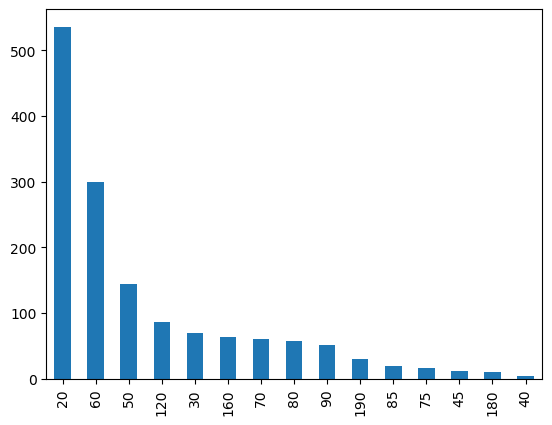

c:\users\casper\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\casper\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\casper\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


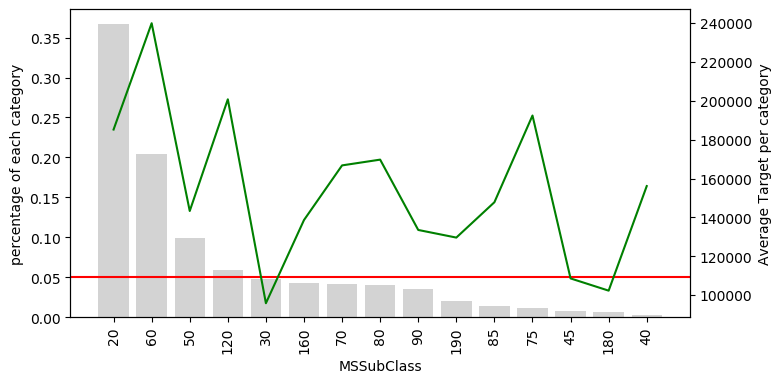

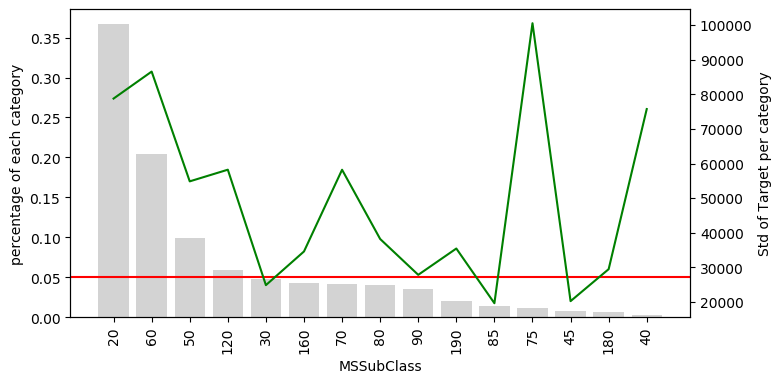

In [15]:
#ID feature is not informative for ML model, so we ignore it,but only used for identifying houses in the last prediction section
#First Feature : MSSubClass : Categorical-Nominal Data, type :int64
"""
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
"""
print(dataset["MSSubClass"].unique())
print(dataset["MSSubClass"].value_counts())
print("Nan Values  " + str(dataset.MSSubClass.isna().sum()))
dataset["MSSubClass"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="MSSubClass", targetName="SalePrice")
calculateStdTargetPerCategory(dataset, featureName="MSSubClass", targetName="SalePrice")

In [16]:
#We will semantically group categories 
#the categories; [20,30,40,120], [45,50,150], [60,70,75,160],[80,85,90,180,190] 
#=>With respect to the data description, train data does not include example of 150,
#anyway we will include into group due to probability of seeing in test data.

#Get dummies
MSSubClass_columns = pd.get_dummies(dataset["MSSubClass"])
MSSubClassGroup1=MSSubClass_columns[[20,30,40,120]].max(axis=1)
try:
    MSSubClassGroup2=MSSubClass_columns[[45,50,150]].max(axis=1)
except:
    MSSubClassGroup2=MSSubClass_columns[[45,50]].max(axis=1)
MSSubClassGroup3=MSSubClass_columns[[60,70,75,160]].max(axis=1)
MSSubClassGroup4=MSSubClass_columns[[80,85,90,180,190]].max(axis=1)
preprocessedDataset["MSSubClassGroup1"]=MSSubClassGroup1.copy().astype(float)
preprocessedDataset["MSSubClassGroup2"]=MSSubClassGroup2.copy().astype(float)
preprocessedDataset["MSSubClassGroup3"]=MSSubClassGroup3.copy().astype(float)
preprocessedDataset["MSSubClassGroup4"]=MSSubClassGroup4.copy().astype(float)
dataset=dataset.drop(columns=['MSSubClass'])

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


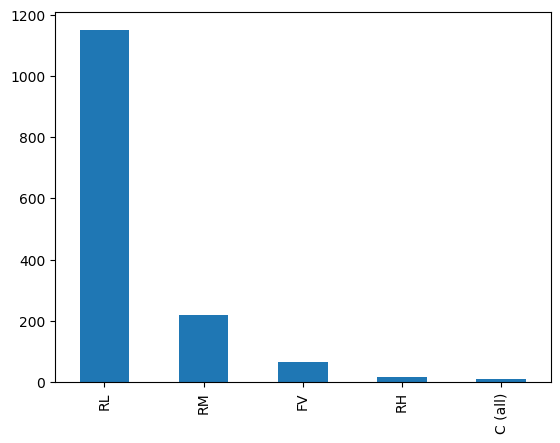

In [17]:
#Next Feature : MSZoning : Identifies the general zoning classification of the sale. Categorical-Nominal Data, type :str
"""
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
"""
print(dataset["MSZoning"].unique())
print(dataset["MSZoning"].value_counts())
dataset["MSZoning"].value_counts().plot(kind='bar')
plt.show()

In [18]:
MSZoning=dataset.pop('MSZoning')
MSZoning.isna().sum()

0

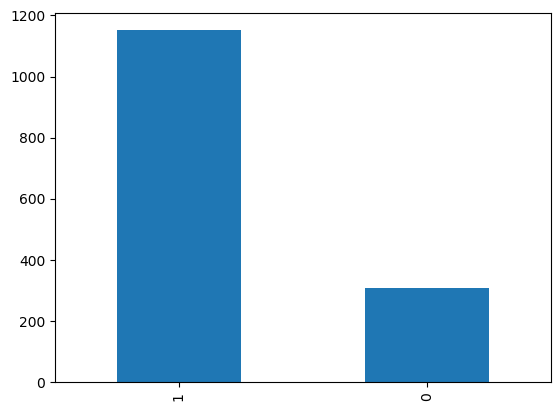

In [19]:
#According to the zoning hist and results, there are 5 cotegories and mostly balanced on RL	Residential Low Density (RL)
#So we will divide it on two binary categories which RL:1 and others:0
MSZoning=MSZoning.map({"RL":1,'RM':0,'C (all)':0, 'FV':0, 'RH':0,'A':0,'I':0,'RP':0})
#Let's see the result
MSZoning.value_counts().plot(kind='bar')
plt.show()

In [20]:
#Add MSZoning on preprocessedDataset
preprocessedDataset["MSZoning"]=MSZoning.copy().astype(float)

['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64


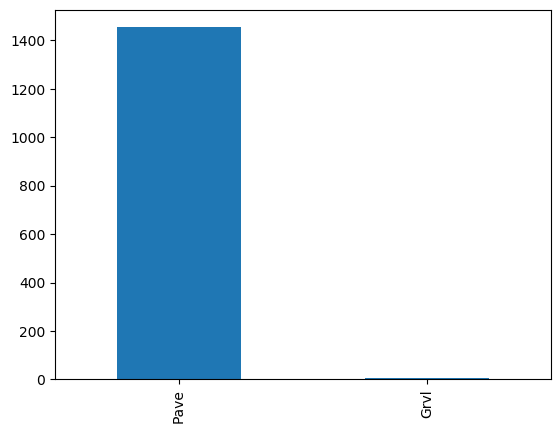

In [21]:
#Next Feature will be another categorical, first we will finish our job with categorical features.
"""Street: Type of road access to property

       Grvl Gravel
       Pave Paved
"""
print(dataset["Street"].unique())
print(dataset["Street"].value_counts())
dataset["Street"].value_counts().plot(kind='bar')
plt.show()
#The Street feature is not informative due to over-imbalanced values, as an instinct, also, I don't believe that it will be useful in multivariate data.
#We will simply drop it

In [22]:
dataset=dataset.drop(columns=["Street"])

['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Nan Values  0


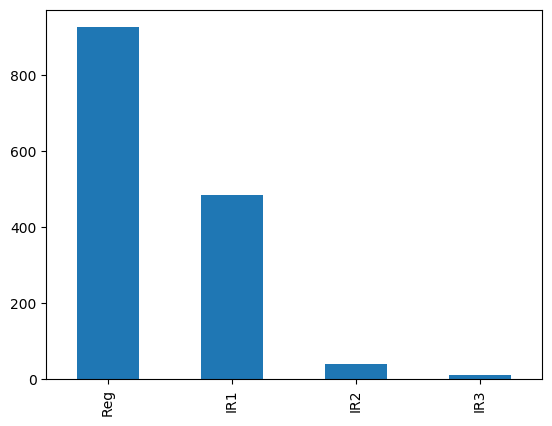

In [23]:
#Next Categorical Feature
"""LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
"""
print(dataset["LotShape"].unique())
print(dataset["LotShape"].value_counts())
print("Nan Values  " + str(dataset.LotShape.isna().sum()))
dataset["LotShape"].value_counts().plot(kind='bar')
plt.show()

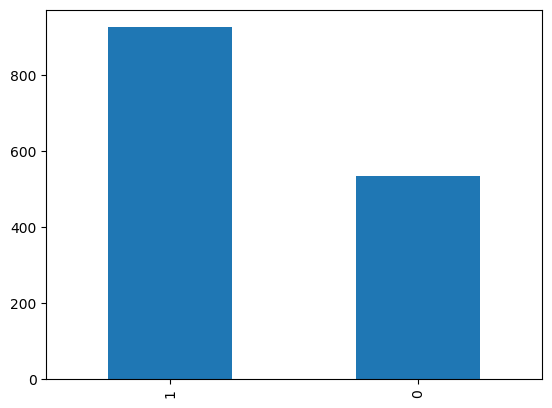

In [24]:
#We will categorize this feature with a binary manner, such as regular :1 and irregular(others):0
LotShape=dataset.pop("LotShape")
LotShape=LotShape.map({"Reg":1,'IR1':0,'IR2':0, 'IR3':0})
#Let's see the result
LotShape.value_counts().plot(kind='bar')
plt.show()

In [25]:
preprocessedDataset["LotShape"]=LotShape.copy().astype(float)

['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Nan Values  0


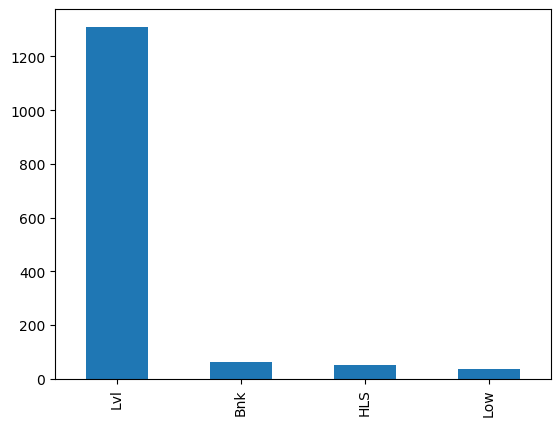

In [26]:
#Next Categorical Feature
"""LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
"""
print(dataset["LandContour"].unique())
print(dataset["LandContour"].value_counts())
print("Nan Values  " + str(dataset.LandContour.isna().sum()))
dataset["LandContour"].value_counts().plot(kind='bar')
plt.show()

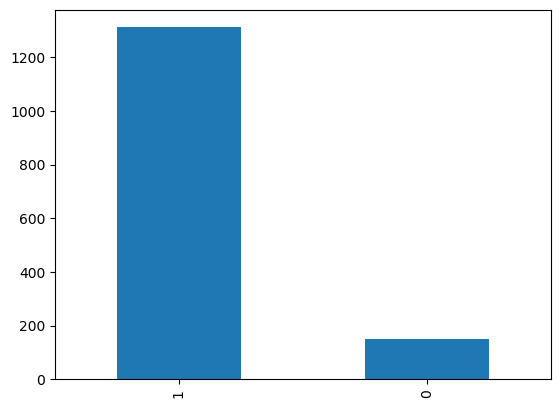

In [27]:
#Feature seems intense with respect to "Lvl" value. It is so early to eliminate this feaure right now, so I will keep it later after checking feature elimination approaches and maybe model improvement
#We will categorize this feature with a binary manner, such as Lvl :1 and others:0
LandContour=dataset.pop("LandContour")
LandContour=LandContour.map({"Lvl":1,'Bnk':0,'HLS':0, 'Low':0})
#Let's see the result
LandContour.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LandContour"]=LandContour.copy().astype(float)

['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Nan Values  0


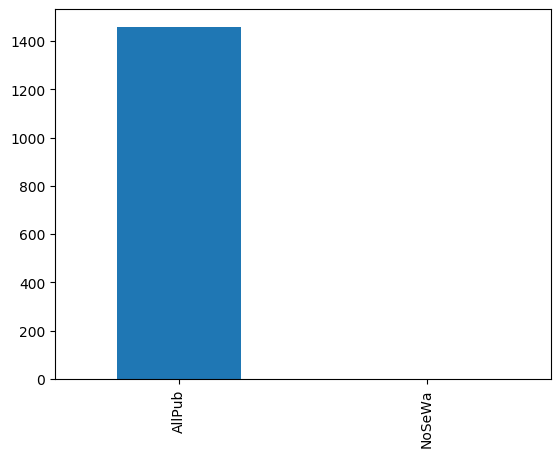

In [28]:
#Next Categorical Feature
"""Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
"""
print(dataset["Utilities"].unique())
print(dataset["Utilities"].value_counts())
print("Nan Values  " + str(dataset.Utilities.isna().sum()))
dataset["Utilities"].value_counts().plot(kind='bar')
plt.show()

In [29]:
#We will simply drop it due to non-informatic
dataset=dataset.drop(columns=["Utilities"])

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Nan Values  0


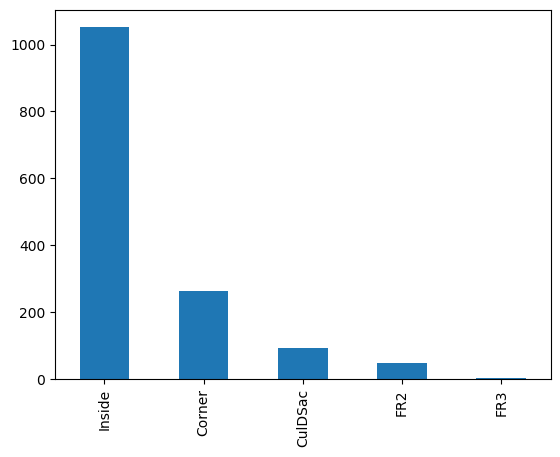

In [30]:
#Next Categorical Feature
"""LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
"""
print(dataset["LotConfig"].unique())
print(dataset["LotConfig"].value_counts())
print("Nan Values  " + str(dataset.LotConfig.isna().sum()))
dataset["LotConfig"].value_counts().plot(kind='bar')
plt.show()

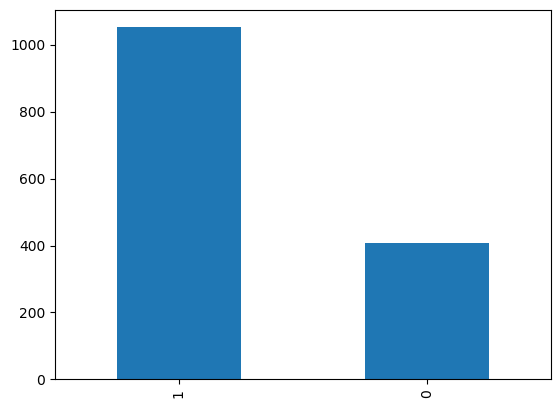

In [31]:
#We will categorize this feature with a binary manner, such as Inside :1 and others:0
LotConfig=dataset.pop("LotConfig")
LotConfig=LotConfig.map({"Inside":1,'Corner':0,'CulDSac':0, 'FR2':0, 'FR3':0})
#Let's see the result
LotConfig.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LotConfig"]=LotConfig.copy().astype(float)

['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Nan Values  0


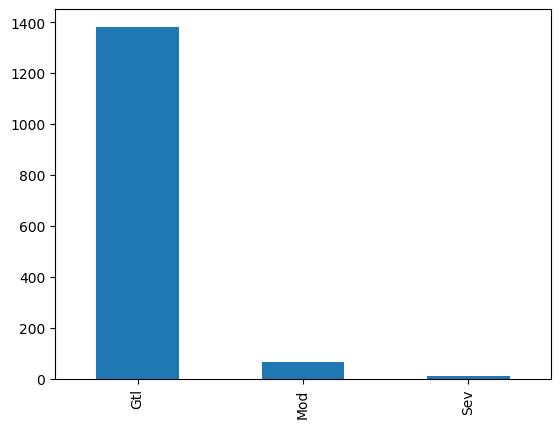

In [32]:
#Next Categorical Feature
"""LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
"""
print(dataset["LandSlope"].unique())
print(dataset["LandSlope"].value_counts())
print("Nan Values  " + str(dataset.LandSlope.isna().sum()))
dataset["LandSlope"].value_counts().plot(kind='bar')
plt.show()

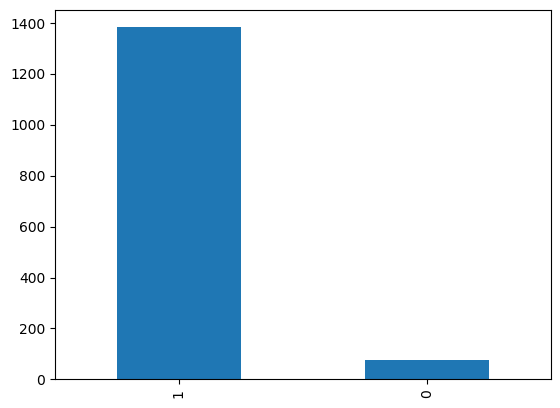

In [33]:
#We will categorize this feature with a binary manner, such as Gtl :1 and others:0
LandSlope=dataset.pop("LandSlope")
LandSlope=LandSlope.map({"Gtl":1,'Mod':0,'Sev':0})
#Let's see the result
LandSlope.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LandSlope"]=LandSlope.copy().astype(float)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Nan Values  0


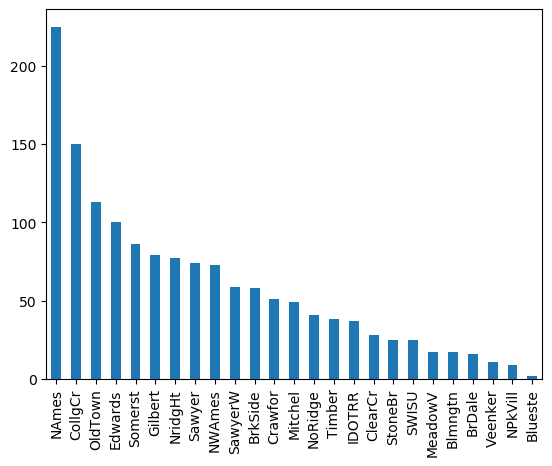

In [34]:
#Next Categorical Feature
"""Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
"""
print(dataset["Neighborhood"].unique())
print(dataset["Neighborhood"].value_counts())
print("Nan Values  " + str(dataset.Neighborhood.isna().sum()))
dataset["Neighborhood"].value_counts().plot(kind='bar')
plt.show()
#This feature is one of the important because location directly effects the price.
#If we group this feature that must be w.r.t. closeness as a distence or zone.
#And if we convert it dummy or one-hot encoding, it will result in so sparisity and high variation.
#Also I don't know the location of these places accordence with neighborhood to each other. 
#So I will keep the analysis of this feature later... for now.

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Nan Values  0


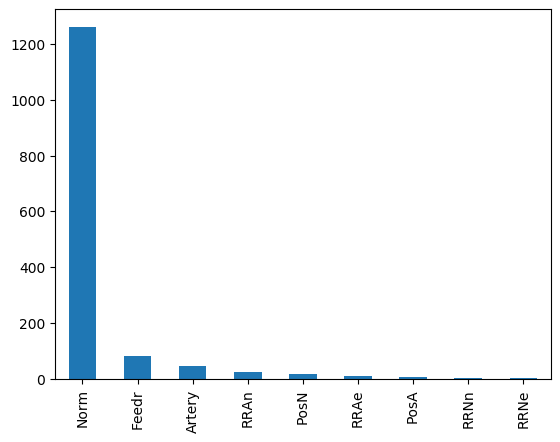

In [35]:
#Next Categorical Feature
"""Condition1: Proximity to various conditions, as well as Condition2 is almost same info so I will keep only Condition1
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
    Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
"""
print(dataset["Condition1"].unique())
print(dataset["Condition1"].value_counts())
print("Nan Values  " + str(dataset.Condition1.isna().sum()))
dataset["Condition1"].value_counts().plot(kind='bar')
plt.show()

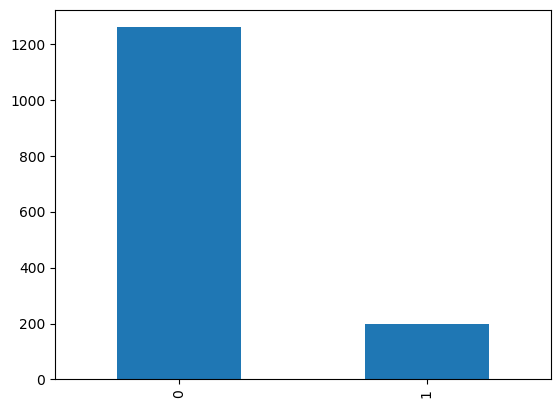

In [36]:
#We will categorize this feature with a binary manner, such as Norm :0 and others:1
Condition1=dataset.pop("Condition1")
dataset=dataset.drop(columns=["Condition2"])
Condition1=Condition1.map({"Norm":0,'Feedr':1, 'PosN':1, 'Artery':1, 'RRAe':1,
                           'RRNn':1, 'RRAn':1, 'PosA':1, 'RRNe':1})
#Let's see the result
Condition1.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["Conditions"]=Condition1.copy().astype(float)

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Nan Values  0


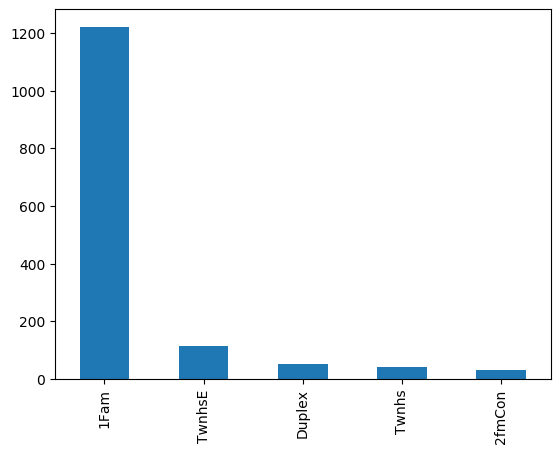

In [37]:
#Next Categorical Feature
"""BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
"""
print(dataset["BldgType"].unique())
print(dataset["BldgType"].value_counts())
print("Nan Values  " + str(dataset.BldgType.isna().sum()))
dataset["BldgType"].value_counts().plot(kind='bar')
plt.show()

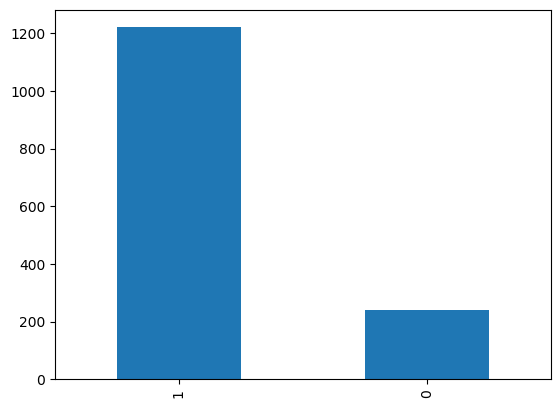

In [38]:
#We will categorize this feature with a binary manner, such as 1Fam :1 and others:0
BldgType=dataset.pop("BldgType")
BldgType=BldgType.map({'1Fam':1, '2fmCon':0, 'Duplex':0, 'TwnhsE':0, 'Twnhs':0})
#Let's see the result
BldgType.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["BldgType"]=BldgType.copy().astype(float)

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Nan Values  0


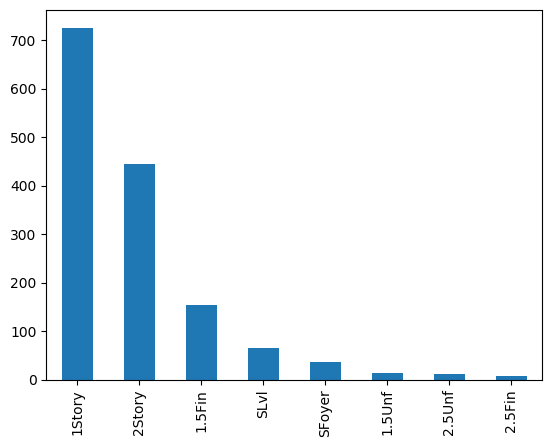

In [39]:
#Next Categorical Feature
"""HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
"""
print(dataset["HouseStyle"].unique())
print(dataset["HouseStyle"].value_counts())
print("Nan Values  " + str(dataset.HouseStyle.isna().sum()))
dataset["HouseStyle"].value_counts().plot(kind='bar')
plt.show()

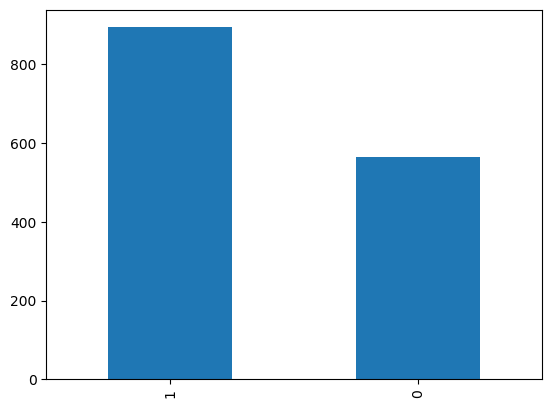

In [40]:
#We will categorize this feature floor based with a binary manner, such as 1based Floors :1 and others:0
HouseStyle=dataset.pop("HouseStyle")
HouseStyle=HouseStyle.map({'1Story':1, '1.5Fin':1, '1.5Unf':1,
                           '2Story':0, '2.5Fin':0, '2.5Unf':0, 'SFoyer':0, 'SLvl':0})
#Let's see the result
HouseStyle.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["HouseStyle"]=HouseStyle.copy().astype(float)

[ 7  6  8  5  9  4 10  3  1  2]
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Nan Values  0


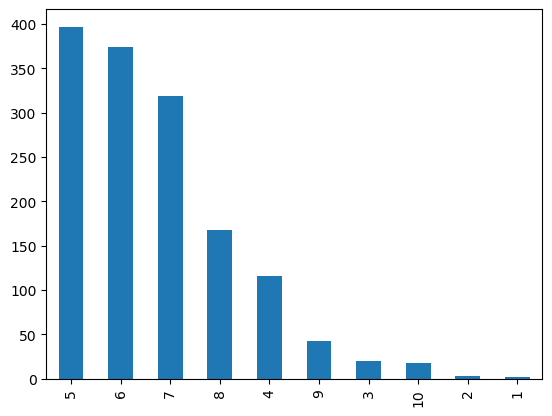

In [41]:
#Next Categorical Feature-Type of Ordinal Categorical
"""OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
"""
print(dataset["OverallQual"].unique())
print(dataset["OverallQual"].value_counts())
print("Nan Values  " + str(dataset.OverallQual.isna().sum()))
dataset["OverallQual"].value_counts().plot(kind='bar')
plt.show()

In [42]:
#We will keep this variable is in Ordinal scale as encoded.
preprocessedDataset["OverallQual"]=dataset.pop("OverallQual")

[5 8 6 7 4 2 3 9 1]
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
Nan Values  0


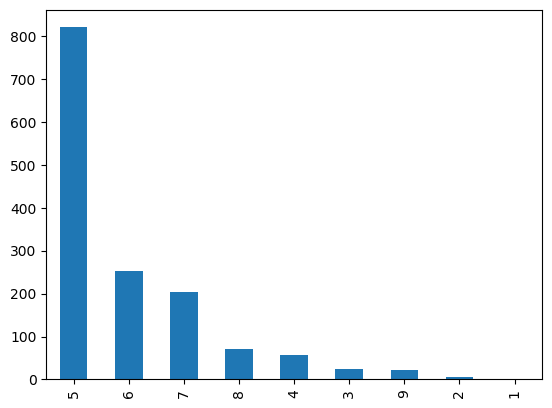

In [43]:
#Next Categorical Feature-Type of Ordinal Categorical
"""OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
"""
print(dataset["OverallCond"].unique())
print(dataset["OverallCond"].value_counts())
print("Nan Values  " + str(dataset.OverallCond.isna().sum()))
dataset["OverallCond"].value_counts().plot(kind='bar')
plt.show()
#We will keep this variable is in Ordinal scale as encoded, too.
preprocessedDataset["OverallCond"]=dataset.pop("OverallCond")

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Nan Values  0


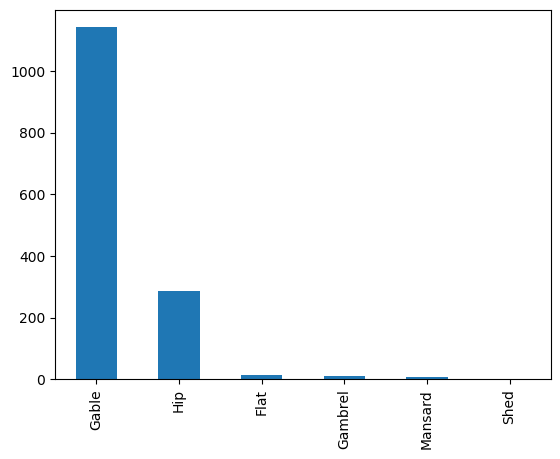

In [44]:
#Next Categorical Feature-Type of Nominal
"""RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
"""
print(dataset["RoofStyle"].unique())
print(dataset["RoofStyle"].value_counts())
print("Nan Values  " + str(dataset.RoofStyle.isna().sum()))
dataset["RoofStyle"].value_counts().plot(kind='bar')
plt.show()

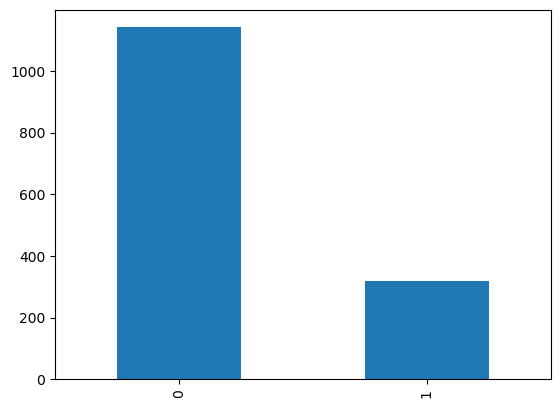

In [45]:
#We will categorize this feature floor based with a binary manner, such as 1based Gable :0 and others:1
RoofStyle=dataset.pop("RoofStyle")
RoofStyle=RoofStyle.map({'Gable':0, 'Hip':1, 'Gambrel':1, 'Mansard':1, 'Flat':1, 'Shed':1})
#Let's see the result
RoofStyle.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["RoofStyle"]=RoofStyle.copy().astype(float)

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Nan Values  0


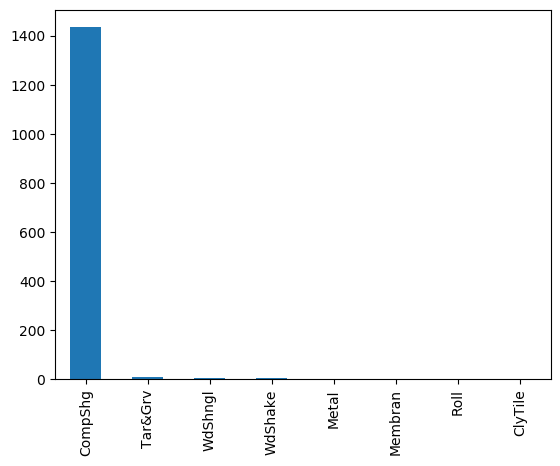

In [46]:
#Next Categorical Feature-Type of Nominal
"""RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
"""
print(dataset["RoofMatl"].unique())
print(dataset["RoofMatl"].value_counts())
print("Nan Values  " + str(dataset.RoofMatl.isna().sum()))
dataset["RoofMatl"].value_counts().plot(kind='bar')
plt.show()

In [47]:
#Simply remove this feature
dataset=dataset.drop(columns=["RoofMatl"])

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
Nan Values  0


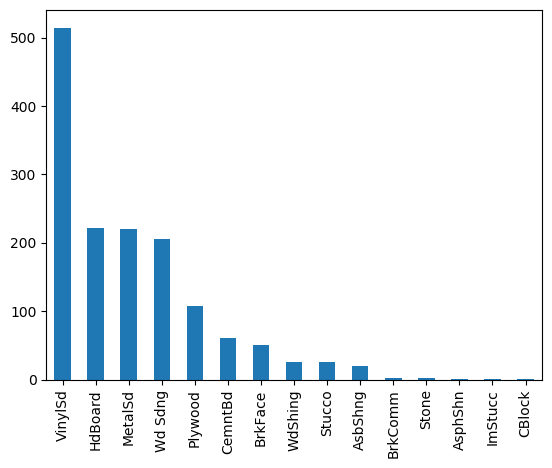

In [48]:
#Next Categorical Feature-Type of Nominal
"""Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
       Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
"""
print(dataset["Exterior1st"].unique())
print(dataset["Exterior1st"].value_counts())
print("Nan Values  " + str(dataset.Exterior1st.isna().sum()))
dataset["Exterior1st"].value_counts().plot(kind='bar')
plt.show()

In [49]:
#We will group categories 
#the categories; [VinylSd], [HdBoard], [MetalSd],[Wd Sdng],[Others] 
#For now, we will do it manually, for test set we should refactor the code that can handle
#"out of categories" such as "Other" etc.

#Get dummies
Exterior1st_columns = pd.get_dummies(dataset["Exterior1st"])
Exterior1stGroup1=Exterior1st_columns[["HdBoard"]].max(axis=1)
Exterior1stGroup2=Exterior1st_columns[["MetalSd"]].max(axis=1)
Exterior1stGroup3=Exterior1st_columns[["Wd Sdng"]].max(axis=1)
Exterior1stGroup4=Exterior1st_columns[["VinylSd"]].max(axis=1)
Exterior1stGroup5=Exterior1st_columns[["Plywood","CemntBd","BrkFace","WdShing",
                                       "Stucco","AsbShng","BrkComm","Stone","AsphShn",
                                       "ImStucc","CBlock"]].max(axis=1)
                                      

preprocessedDataset["Exterior1stGroup1"]=Exterior1stGroup1.copy().astype(float)
preprocessedDataset["Exterior1stGroup2"]=Exterior1stGroup2.copy().astype(float)
preprocessedDataset["Exterior1stGroup3"]=Exterior1stGroup3.copy().astype(float)
preprocessedDataset["Exterior1stGroup4"]=Exterior1stGroup4.copy().astype(float)
preprocessedDataset["Exterior1stGroup5"]=Exterior1stGroup5.copy().astype(float)

dataset=dataset.drop(columns=['Exterior1st','Exterior2nd'])

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Nan Values  8


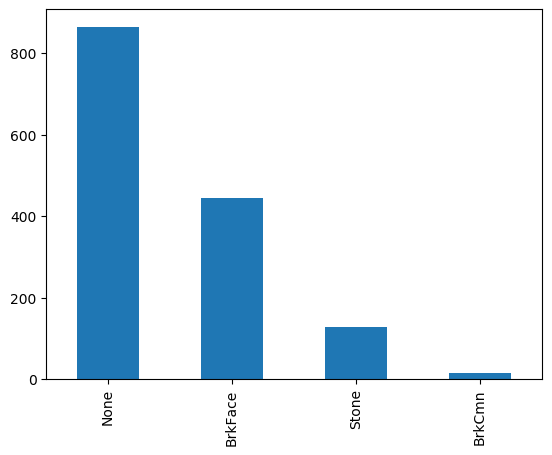

In [50]:
#Next Categorical Feature-Type of Nominal
"""MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
"""
print(dataset["MasVnrType"].unique())
print(dataset["MasVnrType"].value_counts())
print("Nan Values  " + str(dataset.MasVnrType.isna().sum()))
dataset["MasVnrType"].value_counts().plot(kind='bar')
plt.show()

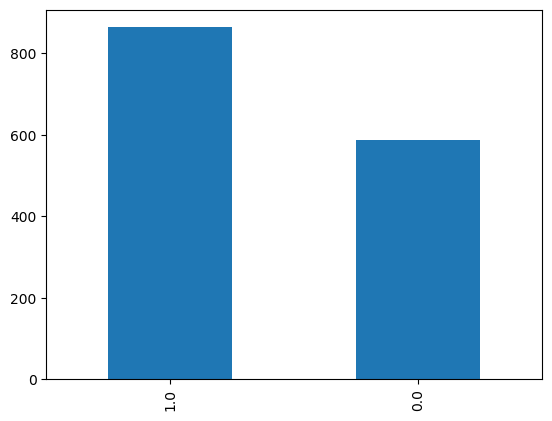

In [51]:
#8 values are missing, we will use filling with mode strategy for this feature
MasVnrType=dataset.pop("MasVnrType")
modeOfMasVnr=MasVnrType.mode()
MasVnrType=MasVnrType.fillna(modeOfMasVnr)
#We will categorize this feature floor based with a binary manner, such as None :1 and others:0
MasVnrType=MasVnrType.map({'None':1, 'BrkCmn':0, 'BrkFace':0, 'CBlock':0, 'Stone':0})
#Let's see the result
MasVnrType.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["MasVnrType"]=MasVnrType.copy().astype(float)

['Gd' 'TA' 'Ex' 'Fa']
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
Nan Values  0


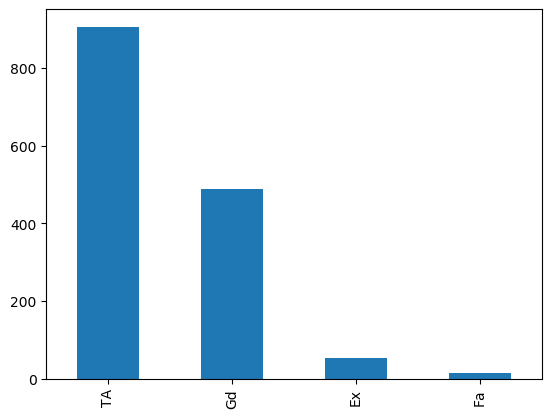

In [52]:
#Next Categorical Feature-Type of Ordinal Categorical
"""ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
"""
print(dataset["ExterQual"].unique())
print(dataset["ExterQual"].value_counts())
print("Nan Values  " + str(dataset.ExterQual.isna().sum()))
dataset["ExterQual"].value_counts().plot(kind='bar')
plt.show()

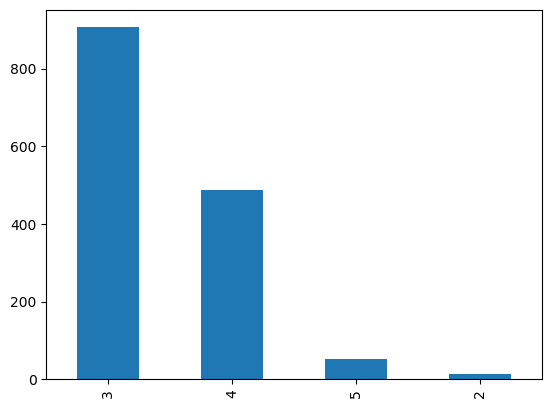

In [53]:
#I will give them ordinal scale. However there exists no poor category,so I will give it 2 to not meet it in test set. 
ExterQual=dataset.pop("ExterQual")
ExterQual=ExterQual.map({'Po':2, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
#Let's see the result
ExterQual.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["ExterQual"]=ExterQual.copy().astype(float)

['TA' 'Gd' 'Fa' 'Po' 'Ex']
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Nan Values  0


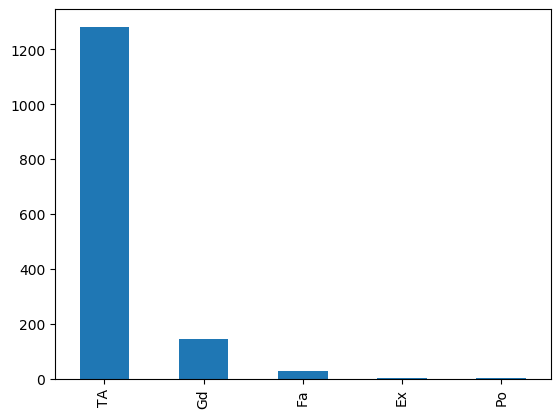

In [54]:
#Next Categorical Feature-Type of Ordinal Categorical
"""ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
"""
print(dataset["ExterCond"].unique())
print(dataset["ExterCond"].value_counts())
print("Nan Values  " + str(dataset.ExterCond.isna().sum()))
dataset["ExterCond"].value_counts().plot(kind='bar')
plt.show()

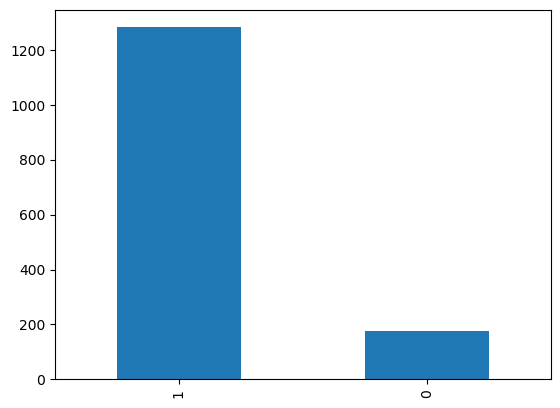

In [55]:
#I will give them binary scale, maybe later we can discard this variable because of high cardinality
ExterCond=dataset.pop("ExterCond")
ExterCond=ExterCond.map({'Po':0, 'Fa':0, 'TA':1, 'Gd':0, 'Ex':0})
#Let's see the result
ExterCond.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["ExterCond"]=ExterCond.copy().astype(float)

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
Nan Values  0


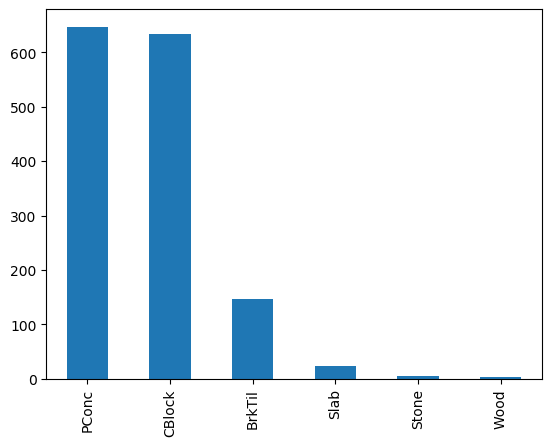

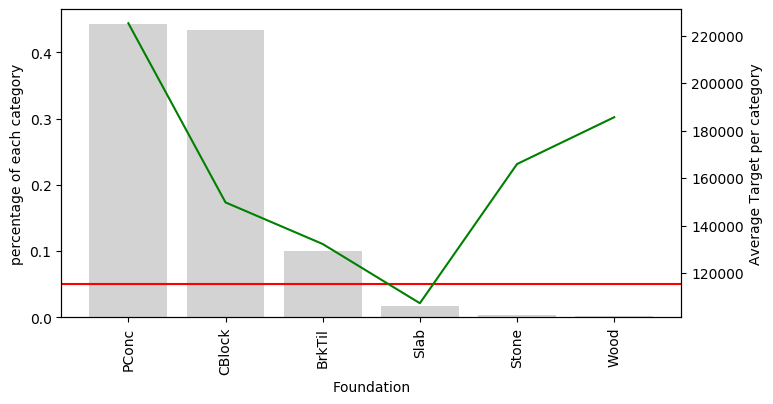

In [56]:
#Next Categorical Feature-Type of Nominal
"""Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
"""
print(dataset["Foundation"].unique())
print(dataset["Foundation"].value_counts())
print("Nan Values  " + str(dataset.Foundation.isna().sum()))
dataset["Foundation"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="Foundation", targetName="SalePrice")


In [57]:
#We will group categories 
#the categories; [VinylSd], [HdBoard], [MetalSd],[Wd Sdng],[Others] 
#For now, we will do it manually, for test set we should refactor the code that can handle
#"all categories".

#Get dummies
Foundation_columns = pd.get_dummies(dataset["Foundation"])
FoundationGroup1=Foundation_columns[['PConc']].max(axis=1)
FoundationGroup2=Foundation_columns[['CBlock']].max(axis=1)
FoundationGroup3=Foundation_columns[['BrkTil', 'Wood', 'Slab', 'Stone']].max(axis=1)

                                      

preprocessedDataset["FoundationGroup1"]=FoundationGroup1.copy().astype(float)
preprocessedDataset["FoundationGroup2"]=FoundationGroup2.copy().astype(float)
preprocessedDataset["FoundationGroup3"]=FoundationGroup3.copy().astype(float)

dataset=dataset.drop(columns=["Foundation"])

['Gd' 'TA' 'Ex' nan 'Fa']
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Nan Values  37


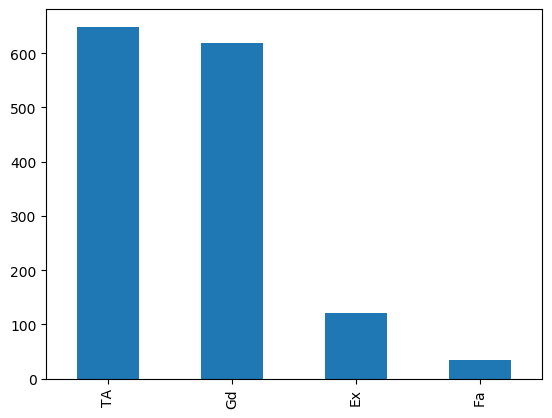

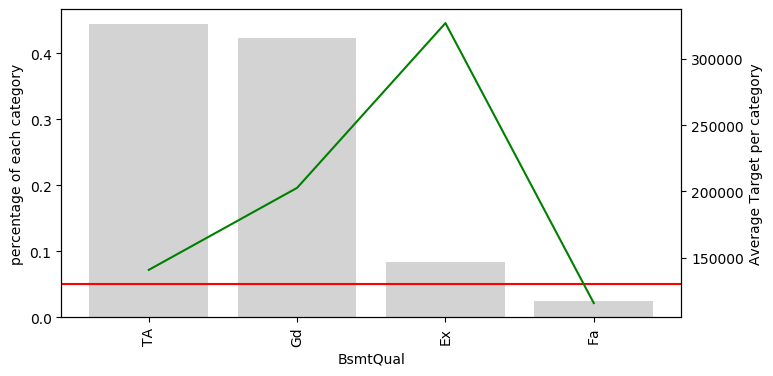

In [58]:
#Next Categorical Feature-Type of Ordinal Categorical
"""BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
"""
print(dataset["BsmtQual"].unique())
print(dataset["BsmtQual"].value_counts())
print("Nan Values  " + str(dataset.BsmtQual.isna().sum()))
dataset["BsmtQual"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="BsmtQual", targetName="SalePrice")


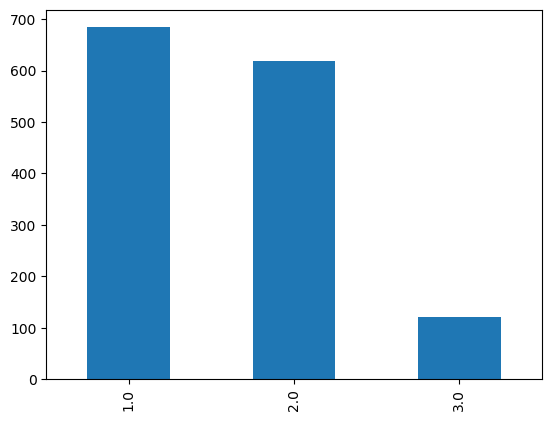

In [59]:
#I will convert them ordinal scale. Cobine Po, Fa and TA cotegries. Their mean prices are noteably low.
BsmtQual=dataset.pop("BsmtQual")
BsmtQual=BsmtQual.map({'Po':1, 'Fa':1, 'TA':1, 'Gd':2, 'Ex':3})
#Let's see the result
BsmtQual.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["BsmtQual"]=BsmtQual.copy().astype(float)

['TA' 'Gd' nan 'Fa' 'Po']
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Nan Values  37


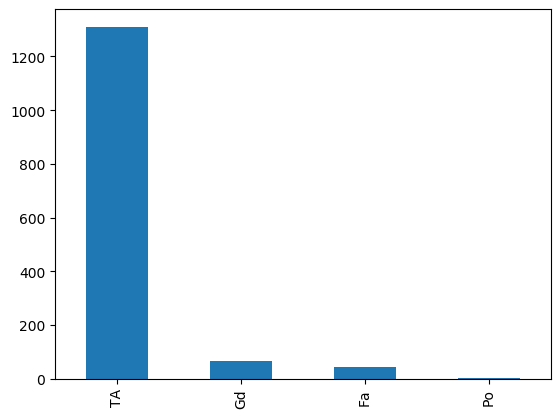

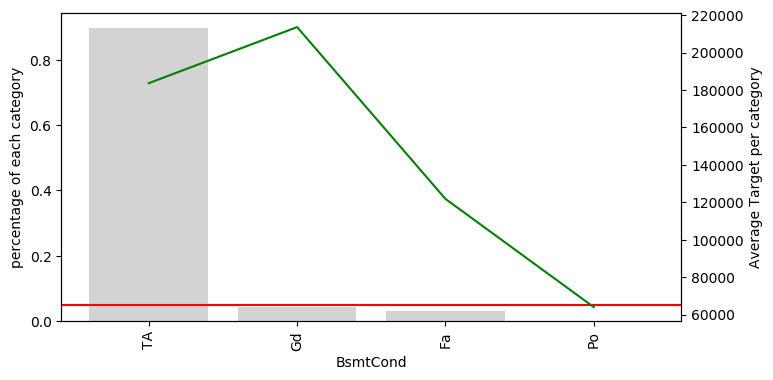

In [60]:
#Next Categorical Feature-Type of Ordinal Categorical
"""BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
"""
print(dataset["BsmtCond"].unique())
print(dataset["BsmtCond"].value_counts())
print("Nan Values  " + str(dataset.BsmtCond.isna().sum()))
dataset["BsmtCond"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="BsmtCond", targetName="SalePrice")

In [61]:
#The feature seems to have highly cardinal "TA" label and we will discard the feature.
dataset=dataset.drop(columns=["BsmtCond"])

['No' 'Gd' 'Mn' 'Av' nan]
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Nan Values  38


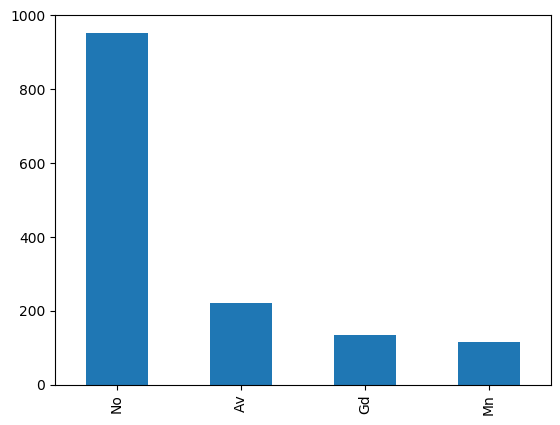

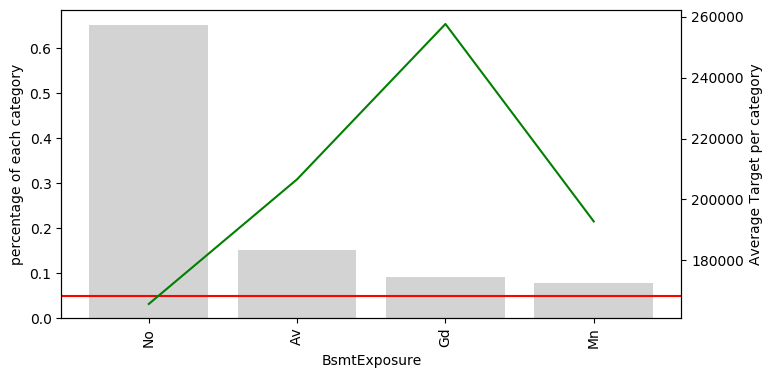

In [62]:
#Next Categorical Feature-Type of Ordinal Categorical
"""BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
"""
print(dataset["BsmtExposure"].unique())
print(dataset["BsmtExposure"].value_counts())
print("Nan Values  " + str(dataset.BsmtExposure.isna().sum()))
dataset["BsmtExposure"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="BsmtExposure", targetName="SalePrice")

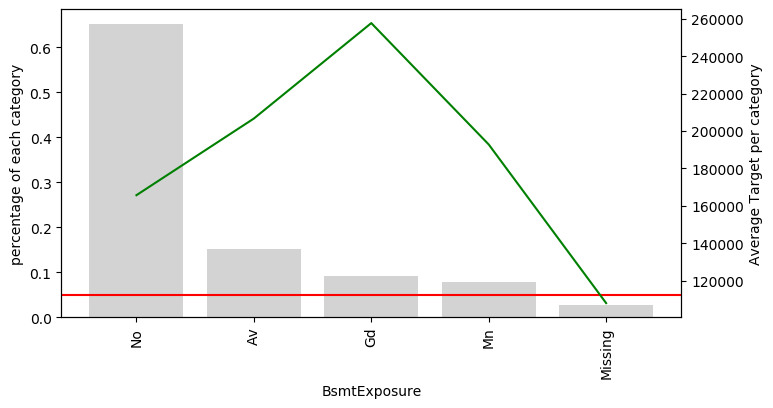

In [63]:
#We should check missing values' price behaviors. So we will give none values a category as "missing"
dataset["BsmtExposure"]=dataset["BsmtExposure"].fillna("Missing")
calculateMeanTargetPerCategory(dataset, featureName="BsmtExposure", targetName="SalePrice")

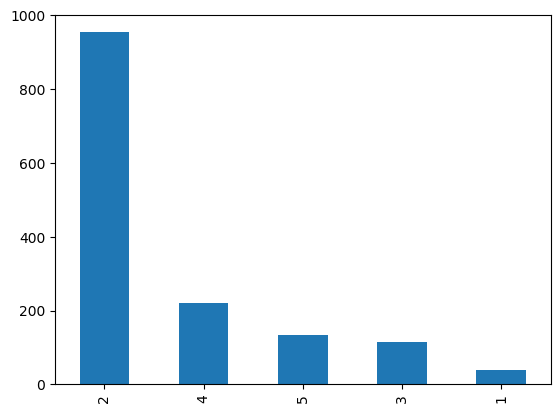

In [68]:
#We can see that Missing values show so low mean on house prices, so I will keep them missing and
#combine them with "na" label if exist in test set
BsmtExposure=dataset.pop("BsmtExposure")
BsmtExposure=BsmtExposure.map({'Missing':1, 'NA':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})
#Let's see the result
BsmtExposure.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["BsmtExposure"]=BsmtExposure.copy().astype(float)

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Nan Values  37


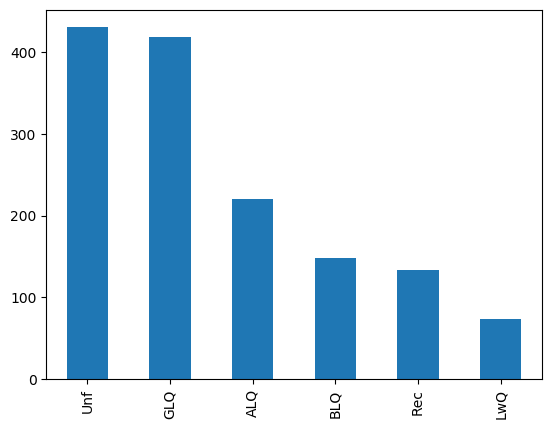

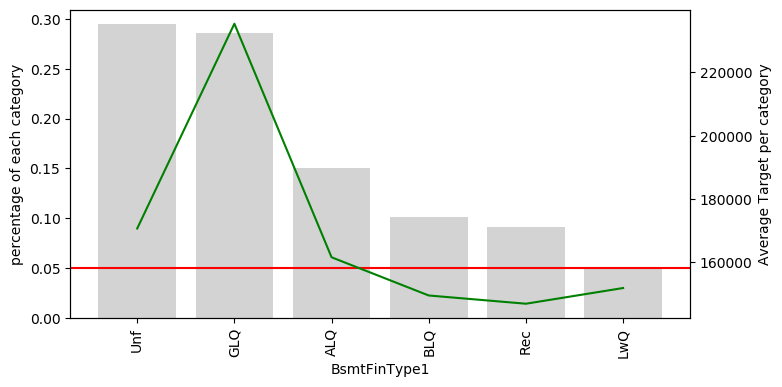

In [69]:
#Next Categorical Feature-Type of Ordinal Categorical
"""BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
"""
print(dataset["BsmtFinType1"].unique())
print(dataset["BsmtFinType1"].value_counts())
print("Nan Values  " + str(dataset.BsmtFinType1.isna().sum()))
dataset["BsmtFinType1"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="BsmtFinType1", targetName="SalePrice")

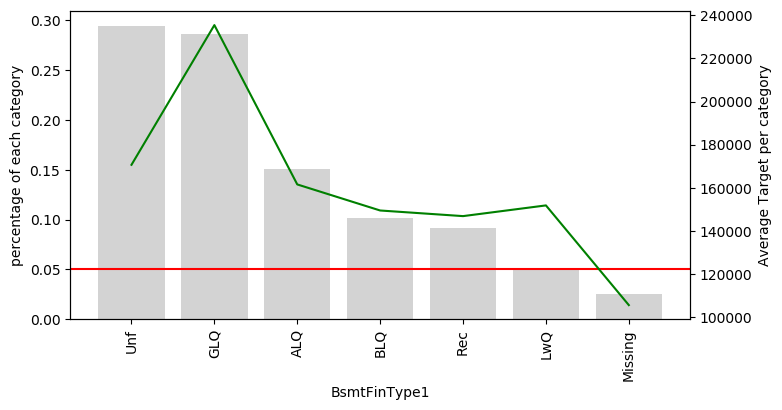

In [70]:
#We should check missing values' price behaviors. So we will give none values a category as "missing"
dataset["BsmtFinType1"]=dataset["BsmtFinType1"].fillna("Missing")
calculateMeanTargetPerCategory(dataset, featureName="BsmtFinType1", targetName="SalePrice")

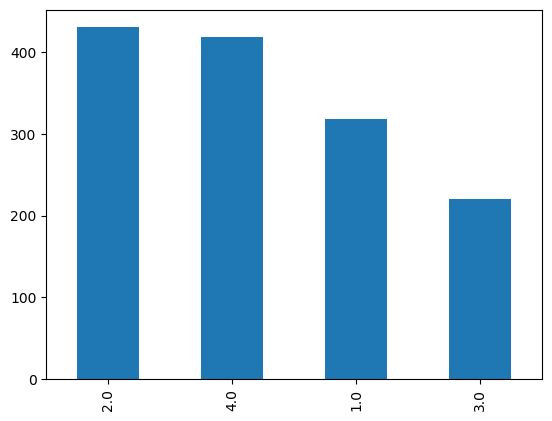

In [71]:
#According to mean prices, Sequeced rating BLQ,Rec and Lwq almost show same mean of prices except for Unf, So I will keep Unf,but combine others
#and with respect to mean price, unfished basement area seems more qualified so I will make it higher rank.
BsmtFinType1=dataset.pop("BsmtFinType1")
BsmtFinType1=BsmtFinType1.map({'Missing':1, 'NA':1, 'LWQ':1, 'Rec':1, 'BLQ':1, 'Unf':2,'ALQ':3,'GLQ':4})
#Let's see the result
BsmtFinType1.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["BsmtFinType1"]=BsmtFinType1.copy().astype(float)

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Nan Values  38


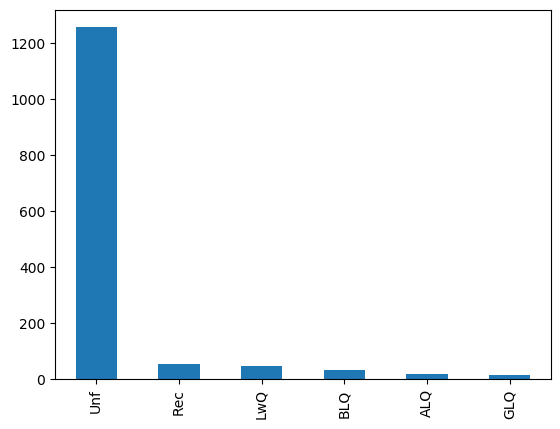

c:\users\casper\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\casper\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\casper\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


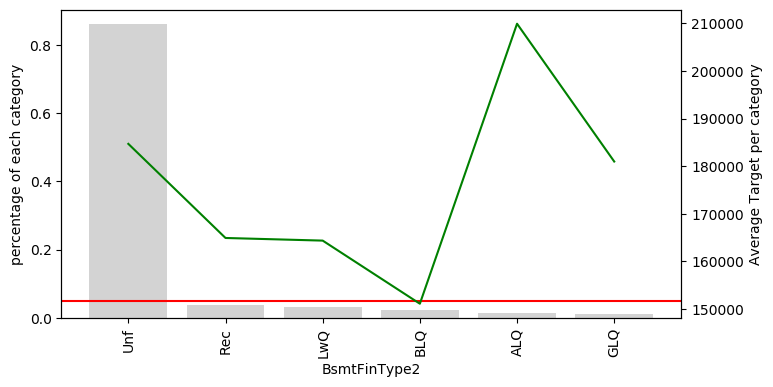

In [72]:
#Next Categorical Feature-Type of Ordinal Categorical
"""BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
"""
print(dataset["BsmtFinType2"].unique())
print(dataset["BsmtFinType2"].value_counts())
print("Nan Values  " + str(dataset.BsmtFinType2.isna().sum()))
dataset["BsmtFinType2"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="BsmtFinType2", targetName="SalePrice")

In [74]:
#For 6 categories, the balance of data is not quite enough,so remove this feature.
dataset=dataset.drop(columns=["BsmtFinType2"])

In [76]:
#Also we will delete dependent feature of BsmtFinType2 which is numerical one.
#BsmtFinSF2: Type 2 finished square feet
dataset=dataset.drop(columns=["BsmtFinSF2"])

Nan Values  0


['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Nan Values  0


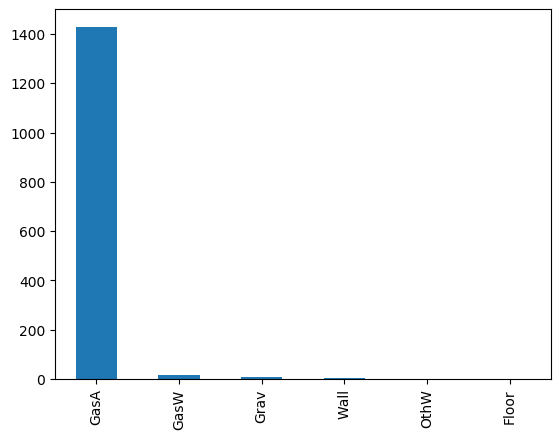

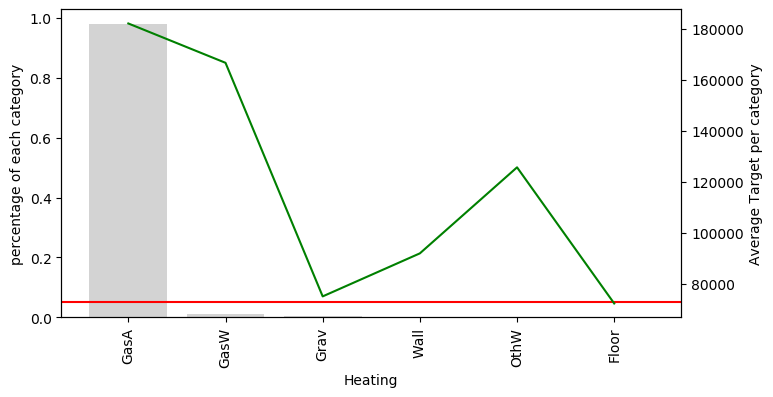

In [77]:
#Next Categorical Feature-Type of Nominal
"""Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
"""
print(dataset["Heating"].unique())
print(dataset["Heating"].value_counts())
print("Nan Values  " + str(dataset.Heating.isna().sum()))
dataset["Heating"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="Heating", targetName="SalePrice")

In [78]:
#Drop it because of high cardinality
dataset=dataset.drop(columns=["Heating"])

['Ex' 'Gd' 'TA' 'Fa' 'Po']
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Nan Values  0


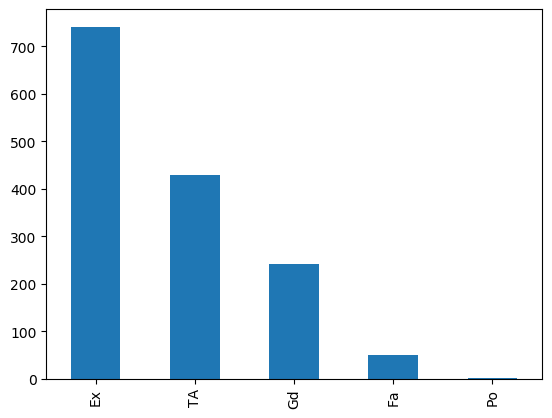

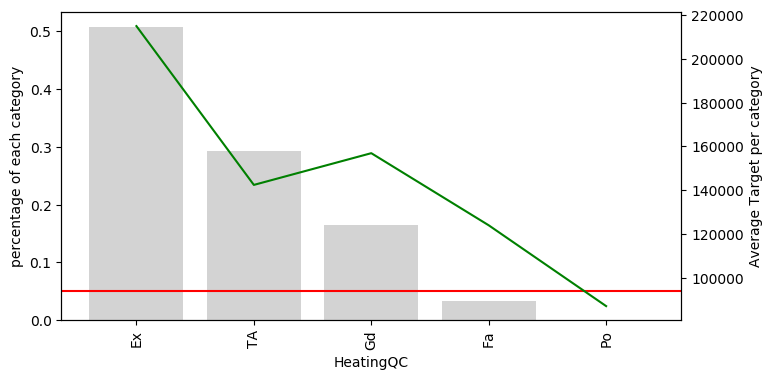

In [79]:
#Next Categorical Feature-Type of Ordinal Categorical
"""HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
"""
print(dataset["HeatingQC"].unique())
print(dataset["HeatingQC"].value_counts())
print("Nan Values  " + str(dataset.HeatingQC.isna().sum()))
dataset["HeatingQC"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="HeatingQC", targetName="SalePrice")

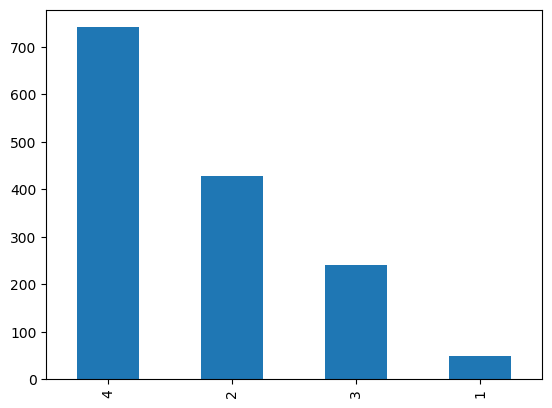

In [80]:
#We will combine poor with fair, and keep it in ordinal scale
HeatingQC=dataset.pop("HeatingQC")
HeatingQC=HeatingQC.map({'Po':1, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
#Let's see the result
HeatingQC.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["HeatingQC"]=HeatingQC.copy().astype(float)

['Y' 'N']
Y    1365
N      95
Name: CentralAir, dtype: int64
Nan Values  0


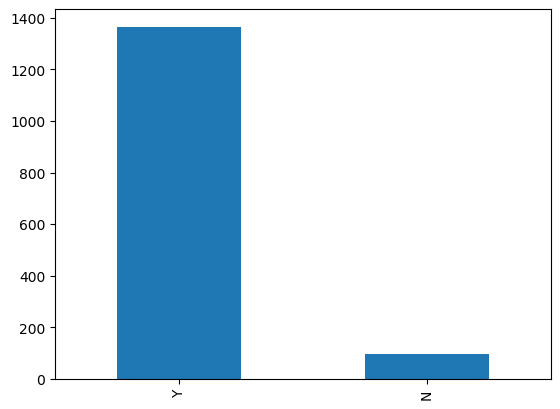

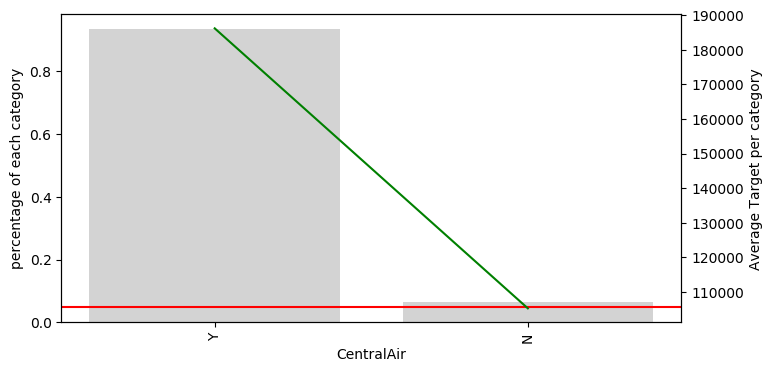

In [81]:
#Next Categorical Feature-Type of Nominal
"""CentralAir: Central air conditioning

       N	No
       Y	Yes
"""
print(dataset["CentralAir"].unique())
print(dataset["CentralAir"].value_counts())
print("Nan Values  " + str(dataset.CentralAir.isna().sum()))
dataset["CentralAir"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="CentralAir", targetName="SalePrice")

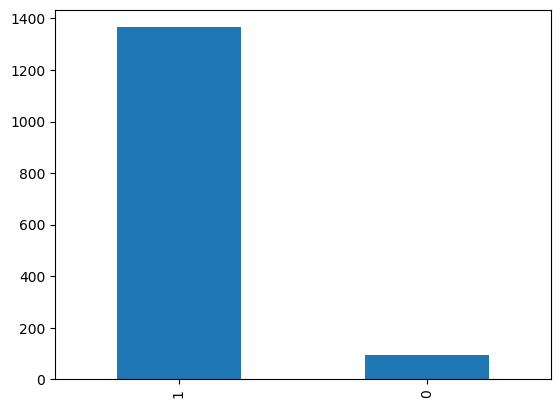

In [82]:
#Make it binary
CentralAir=dataset.pop("CentralAir")
CentralAir=CentralAir.map({'Y':1, 'N':0})
#Let's see the result
CentralAir.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["CentralAir"]=CentralAir.copy().astype(float)

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Nan Values  1


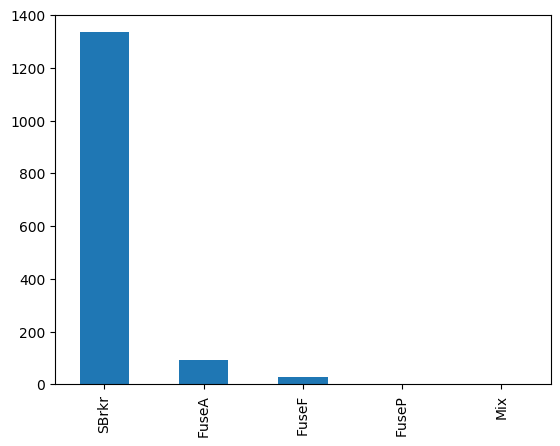

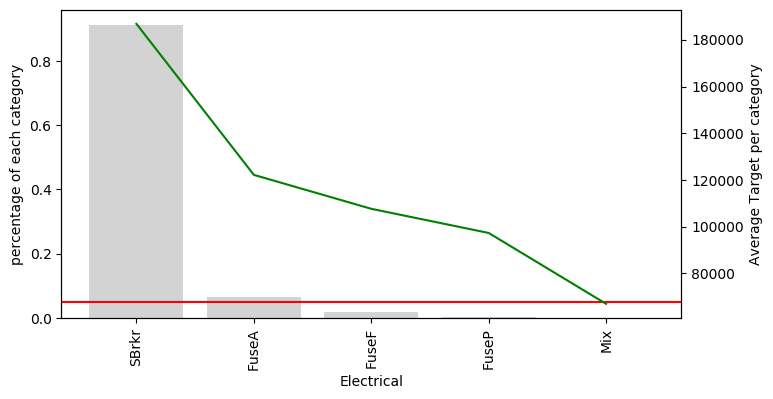

In [83]:
#Next Categorical Feature-Type of Nominal
"""Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
"""
print(dataset["Electrical"].unique())
print(dataset["Electrical"].value_counts())
print("Nan Values  " + str(dataset.Electrical.isna().sum()))
dataset["Electrical"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="Electrical", targetName="SalePrice")

In [85]:
#Drop the feature
dataset=dataset.drop(columns=["Electrical"])

['Gd' 'TA' 'Ex' 'Fa']
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Nan Values  0


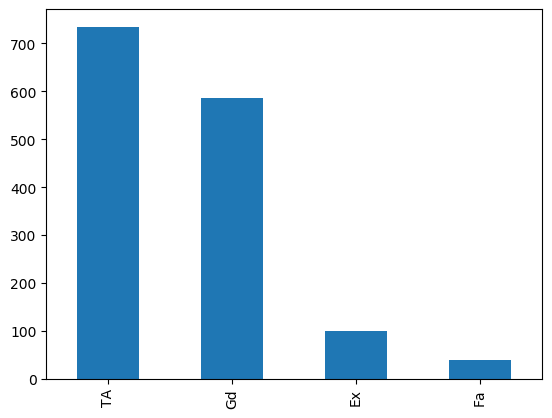

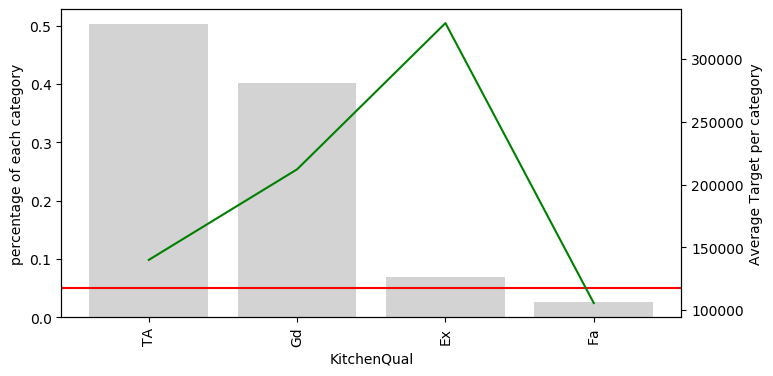

In [86]:
#Next Categorical Feature-Type of Ordinal
"""KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
"""
print(dataset["KitchenQual"].unique())
print(dataset["KitchenQual"].value_counts())
print("Nan Values  " + str(dataset.KitchenQual.isna().sum()))
dataset["KitchenQual"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="KitchenQual", targetName="SalePrice")

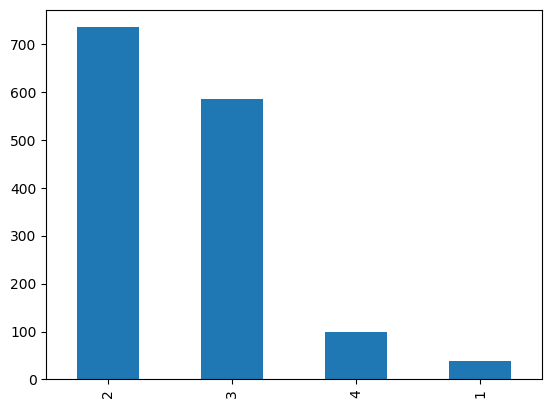

In [87]:
#We will combine poor with fair, and keep it in ordinal scale
KitchenQual=dataset.pop("KitchenQual")
KitchenQual=KitchenQual.map({'Po':1, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
#Let's see the result
KitchenQual.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["KitchenQual"]=KitchenQual.copy().astype(float)

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
Nan Values  0


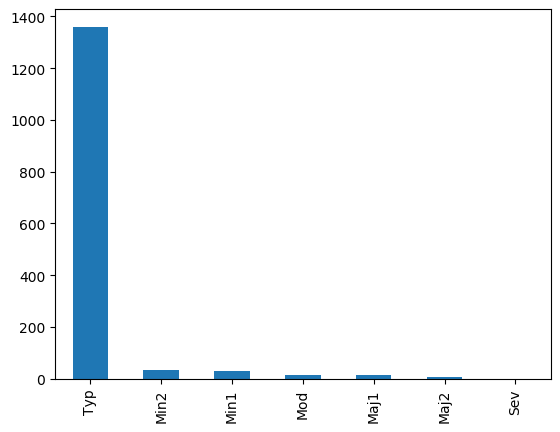

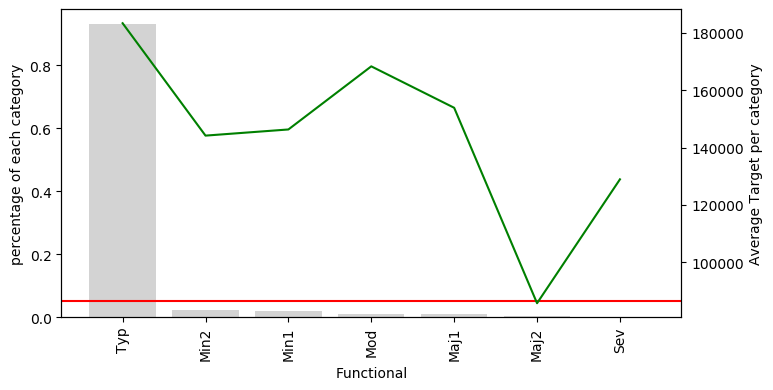

In [88]:
#Next Categorical Feature-Type of Nominal
"""Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
"""
print(dataset["Functional"].unique())
print(dataset["Functional"].value_counts())
print("Nan Values  " + str(dataset.Functional.isna().sum()))
dataset["Functional"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="Functional", targetName="SalePrice")

In [89]:
#Drop the feature
dataset=dataset.drop(columns=["Functional"])

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Nan Values  690


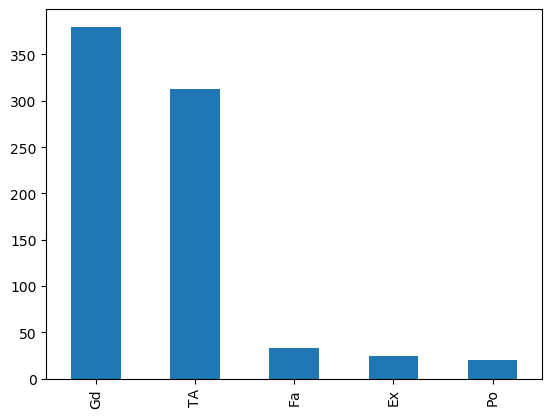

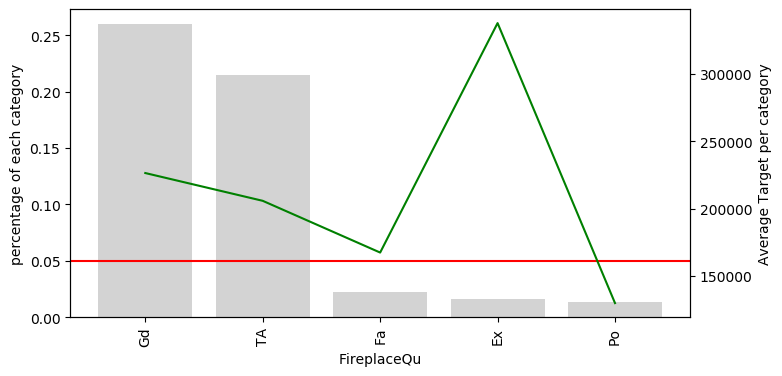

In [91]:
#Next Categorical Feature-Type of Ordinal
"""FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
"""
print(dataset["FireplaceQu"].unique())
print(dataset["FireplaceQu"].value_counts())
print("Nan Values  " + str(dataset.FireplaceQu.isna().sum()))
dataset["FireplaceQu"].value_counts().plot(kind='bar')
plt.show()
calculateMeanTargetPerCategory(dataset, featureName="FireplaceQu", targetName="SalePrice")

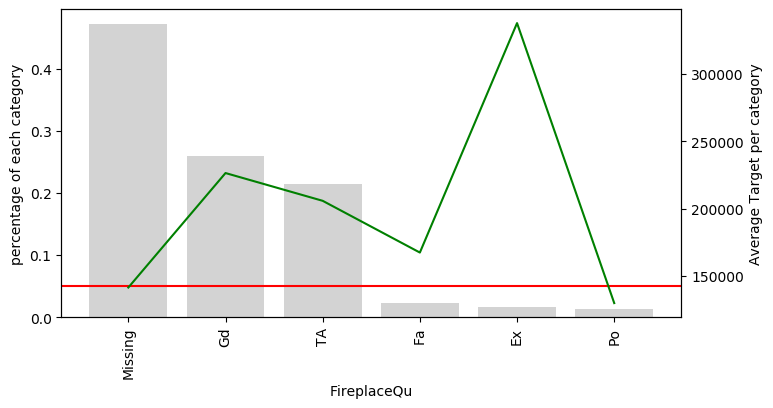

In [92]:
#We should check missing values' price behaviors. So we will give none values a category as "missing"
dataset["FireplaceQu"]=dataset["FireplaceQu"].fillna("Missing")
calculateMeanTargetPerCategory(dataset, featureName="FireplaceQu", targetName="SalePrice")

In [93]:
#Let's search for the reason of missing values by checking # of fireplace 
dataset["Fireplaces"].isna().sum()

0

In [94]:
dataset[["Fireplaces","FireplaceQu"]][dataset.FireplaceQu=="Missing"]
#The reason of Missing value is due to non-existance of Fireplace, so we can combine it with poor and fair because of rare frequency

,Fireplaces,FireplaceQu
0,0,Missing
5,0,Missing
10,0,Missing
12,0,Missing
15,0,Missing
17,0,Missing
18,0,Missing
19,0,Missing
26,0,Missing
29,0,Missing


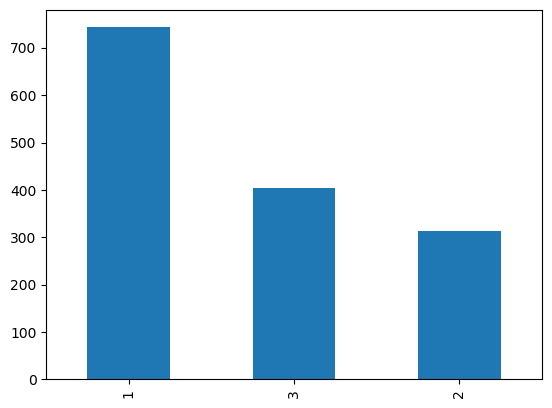

In [95]:
#We will combine poor with fair and missing,and excellent and good will be together too; and keep it in ordinal scale
FireplaceQu=dataset.pop("FireplaceQu")
FireplaceQu=FireplaceQu.map({'Missing':1,'Po':1, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':3})
#Let's see the result
FireplaceQu.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["FireplaceQu"]=FireplaceQu.copy().astype(float)

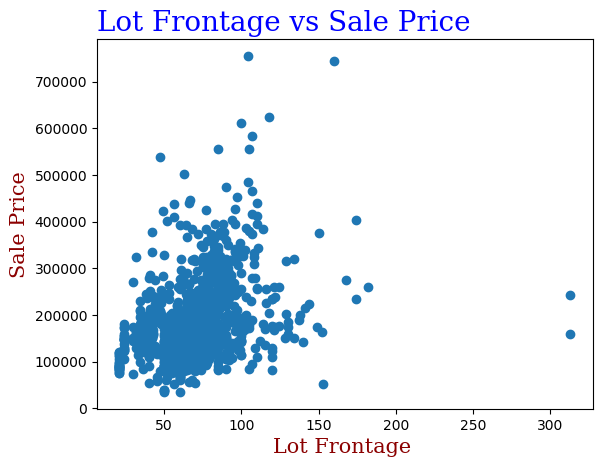

In [64]:
#Next Feature : LotFrontage: Continious-Ratio
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Lot Frontage vs Sale Price", fontdict = font1, loc = 'left')# default loc="middle"
plt.xlabel("Lot Frontage ", fontdict = font2)
plt.ylabel("Sale Price", fontdict = font2)
plt.scatter(dataset['LotFrontage'],dataset["SalePrice"])
plt.show()
#Linearity with some outliers...
preprocessedDataset["LotFrontage"]=dataset['LotFrontage'].copy().astype(float)

In [65]:
#Next Feature: LotArea: Lot size in square feet
LotArea=dataset.LotArea.copy()
LotArea.isna().sum()

0

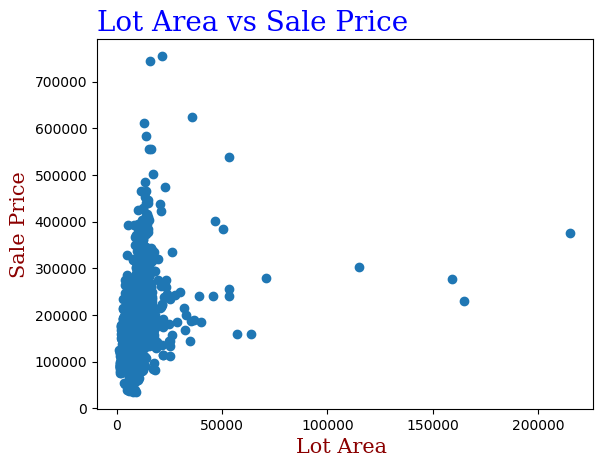

In [66]:
plt.title("Lot Area vs Sale Price", fontdict = font1, loc = 'left')# default loc="middle"
plt.xlabel("Lot Area ", fontdict = font2)
plt.ylabel("Sale Price", fontdict = font2)
plt.scatter(dataset['LotArea'],dataset["SalePrice"])
plt.show()

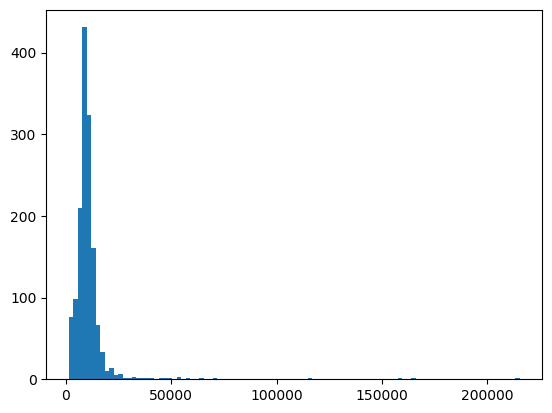

In [67]:
#It looks like there are some misleading data because Lot area 200000 looks enourmous.
#So,we will decide the outliers and change outliers with median of the Lot Size data.
plt.hist(np.array(dataset[['LotArea']]),bins=100)
plt.show()